#<b><u>Regression Problem


# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston_df = load_boston()

In [ ]:
dataset = pd.DataFrame(data = boston_df.data, columns= boston_df.feature_names)
target = pd.DataFrame(data = boston_df.target, columns=['MEDV'])

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset.shape

(506, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


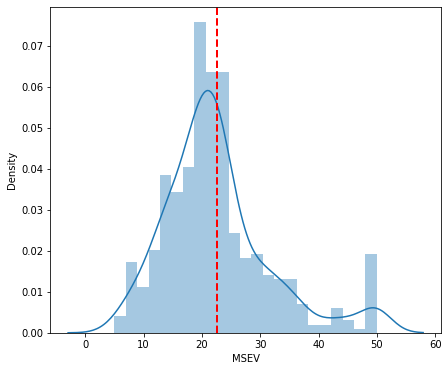

In [ ]:
plt.figure(figsize=(7,6))

sns.distplot(target)
plt.xlabel('MSEV')
plt.axvline(np.mean(target.values), linewidth = 2, linestyle ="--", color ='red')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size= 0.2, random_state=302)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
medv_regressor = DecisionTreeRegressor( max_leaf_nodes=10, random_state=0)
medv_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [ ]:
y_train_pred = medv_regressor.predict(X_train)

In [ ]:
y_test_pred = medv_regressor.predict(X_test)

## Metrics

### Train Dataset

In [ ]:
print(f'Mean Squared Error {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'r2_score {r2_score(y_train, y_train_pred)}')

Mean Squared Error 11.81285998341324
Root Mean Squared Error 3.436984140698534
r2_score 0.8611900292646449


### Test Dataset

In [ ]:
print(f'Mean Squared Error {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'r2_score {r2_score(y_test, y_test_pred)}')

Mean Squared Error 15.665380336727024
Root Mean Squared Error 3.957951532892618
r2_score 0.807883194028519


### Visulaizing Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


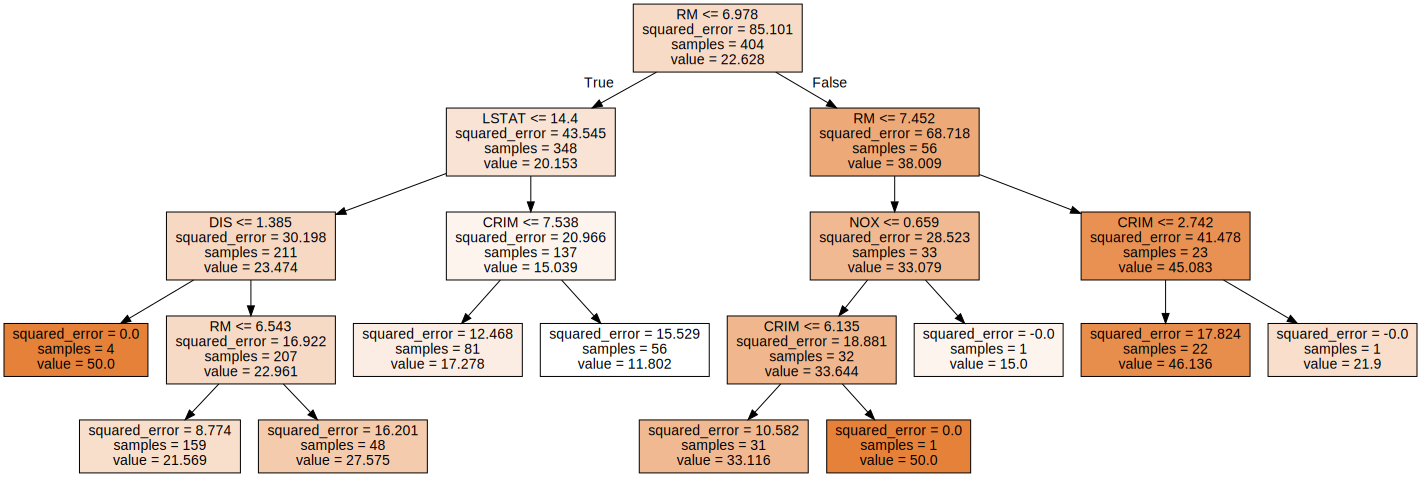

In [ ]:
graph = Source(tree.export_graphviz(medv_regressor, out_file=None
   , feature_names=X_train.columns , filled = True))
display(SVG(graph.pipe(format='svg')))


#<b><u>Classification Problem

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Alma Notes/Machine Learning/Supervised Learning/Decision Tree/Telco-Customer-Churn.csv')

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
def fn(x):
  if len(x) <= 1:
    return 0
  else:
    return eval(x)

In [ ]:
dataset['TotalCharges'] = dataset['TotalCharges'].apply(lambda x: fn(x))

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
indexs = dataset[dataset['TotalCharges'] == 0].index

In [ ]:
dataset.drop(indexs, axis=0, inplace=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['SeniorCitizen','Churn', 'TotalCharges']]])

,variables,VIF
0,tenure,2.615492
1,MonthlyCharges,2.615492


In [ ]:
df = dataset.copy()

In [ ]:
#Data encoding
#label encoding
encoding = {
    'TechSupport': {'No' : 0, 'Yes': 1, 'No internet service': 0},
    'StreamingTV': {'No' : 0, 'Yes': 1, 'No internet service' : 0},
    'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
    'OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 0},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'OnlineSecurity' : {'No':0, 'Yes': 1, 'No internet service': 0},
    'MultipleLines' : {'No': 0, 'Yes': 1, 'No phone service': 0},
    'Dependents' : {'No': 0, 'Yes': 1},
    'StreamingMovies' : {'No': 0, 'Yes' : 1, 'No internet service': 0},
    'gender': {'Female': 0, 'Male': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'Partner': {'No': 0, 'Yes': 1}
}

df = df.replace(encoding)

In [ ]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], prefix=['NetSrvc', 'Cont', 'pMethod'])

In [ ]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'NetSrvc_DSL', 'NetSrvc_Fiber optic', 'NetSrvc_No',
       'Cont_Month-to-month', 'Cont_One year', 'Cont_Two year',
       'pMethod_Bank transfer (automatic)', 'pMethod_Credit card (automatic)',
       'pMethod_Electronic check', 'pMethod_Mailed check'],
      dtype='object')


In [ ]:
features = ['MonthlyCharges', 'tenure']
features.extend(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'NetSrvc_DSL', 'NetSrvc_Fiber optic', 'NetSrvc_No',
       'Cont_Month-to-month', 'Cont_One year', 'Cont_Two year',
       'pMethod_Bank transfer (automatic)', 'pMethod_Credit card (automatic)',
       'pMethod_Electronic check', 'pMethod_Mailed check'])

In [ ]:
df = df[features]

In [ ]:
df.head()

,MonthlyCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,NetSrvc_DSL,NetSrvc_Fiber optic,NetSrvc_No,Cont_Month-to-month,Cont_One year,Cont_Two year,pMethod_Bank transfer (automatic),pMethod_Credit card (automatic),pMethod_Electronic check,pMethod_Mailed check
0,29.85,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,56.95,34,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,53.85,2,1,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,42.30,45,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,70.70,2,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
dataset['Churn'] = np.where(dataset['Churn'] == 'No', 0, 1)

In [ ]:
X = df
Y = dataset['Churn']

In [ ]:
Y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

classifier.fit(X_class_train, y_class_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [ ]:
class_train_pred = classifier.predict(X_class_train)
class_test_pred = classifier.predict(X_class_test)

In [ ]:
print(f'Train Accuracy : {accuracy_score(class_train_pred, y_class_train)}')
print(f'Test Accuracy : {accuracy_score(class_test_pred, y_class_test)}')
print('  ')
print(f'Train Roc-Auc-Score : {roc_auc_score(class_train_pred, y_class_train)}')
print(f'Test Roc-Auc-Score : {roc_auc_score(class_test_pred, y_class_test)}')
print('  ')
print(f'Train Confusion Matrix :')
print(f'{confusion_matrix(class_train_pred, y_class_train)}')
print(' ')
print(f'Test Confusion Matrix :')
print(f'{confusion_matrix(class_test_pred, y_class_test)}')

Train Accuracy : 0.7917513206013815
Test Accuracy : 0.7890995260663507
  
Train Roc-Auc-Score : 0.7476581586420212
Test Roc-Auc-Score : 0.7379636555491739
  
Train Confusion Matrix :
[[3357  774]
 [ 251  540]]
 
Test Confusion Matrix :
[[1441  331]
 [ 114  224]]


### Visulaizing Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


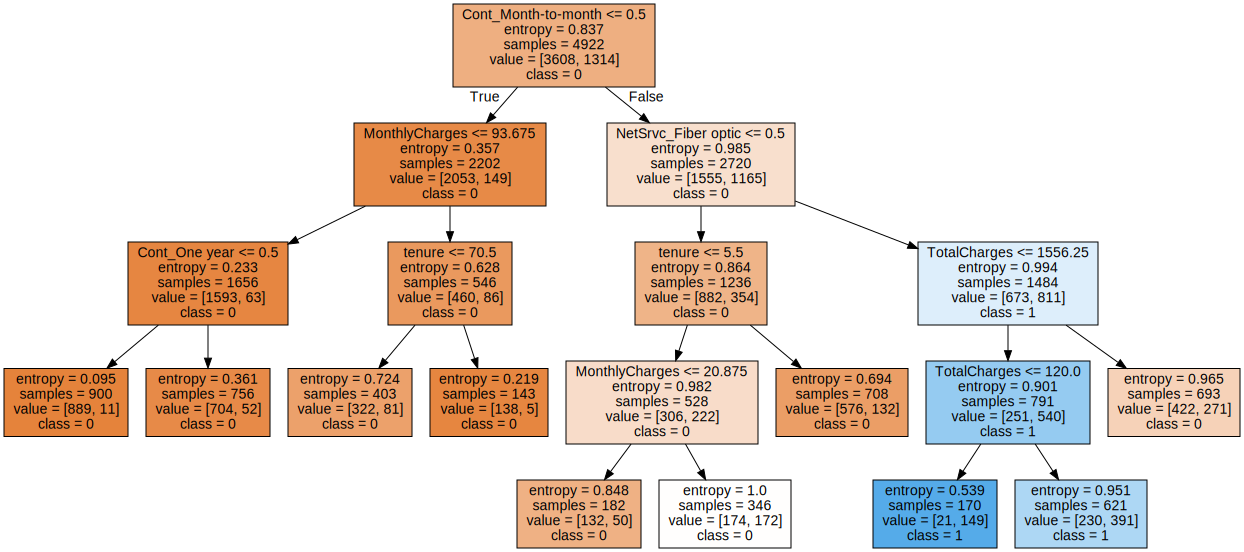

In [ ]:
graph = Source(tree.export_graphviz(classifier, out_file=None
   , feature_names=X_class_train.columns , class_names=['0', '1'], 
    filled = True))
display(SVG(graph.pipe(format='svg')))